In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/netflix_titles.csv')

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [8]:
df.shape

(6234, 12)

In [9]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [11]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,1969
cast,570
country,476
date_added,11
release_year,0
rating,10
duration,0


<Axes: >

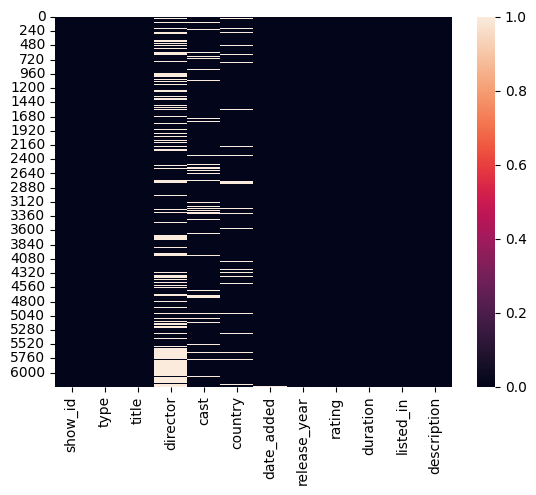

In [17]:
sns.heatmap(df.isnull())

In [31]:
"""we can choose to drop the director and cast columns completely as they are not a huge part
 for us while we visualize the data and they dont add any significant value to our analysis.
We are only focused on visualizing this data hence dropping two columns wont be any trouble for us."""

df.drop(['director','cast'],axis = 1,inplace = True)


In [34]:
df["country"].isnull().sum().value

476

In [36]:
df["country"].value_counts()

,count
country,
United States,2032
India,777
United Kingdom,348
Japan,176
Canada,141
...,...
"India, Japan",1
"Norway, Germany, Sweden",1
"United Kingdom, Canada, France, United States",1


In [42]:
df['country'].replace(np.nan, 'United States',inplace  = True)


<ipython-input-42-6309e7fa97c9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].replace(np.nan, 'United States',inplace  = True)


In [46]:
df['rating'].value_counts()


,count
rating,
TV-MA,2027
TV-14,1698
TV-PG,701
R,508
PG-13,286
NR,218
PG,184
TV-Y7,169
TV-G,149


In [50]:
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
df['rating'].isnull().sum()

<ipython-input-50-c5d68dcbf078>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].replace(np.nan, 'TV-MA',inplace  = True)


0

<Axes: >

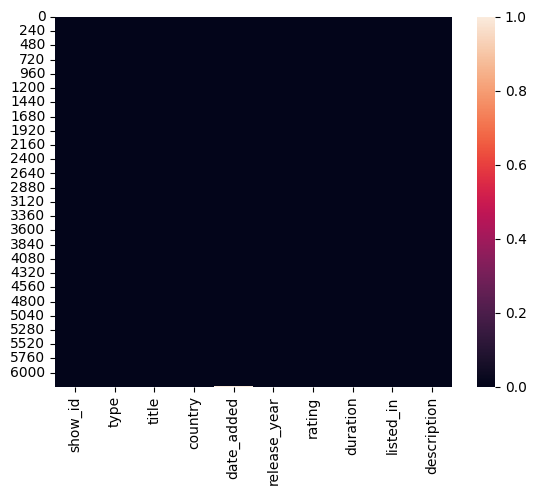

In [51]:
sns.heatmap(df.isnull())


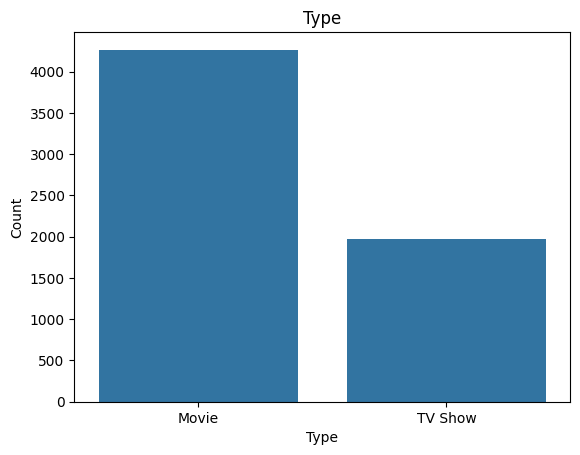

In [23]:
# Movies Vs Tv shows
sns.countplot(data=df, x='type')
plt.title("Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

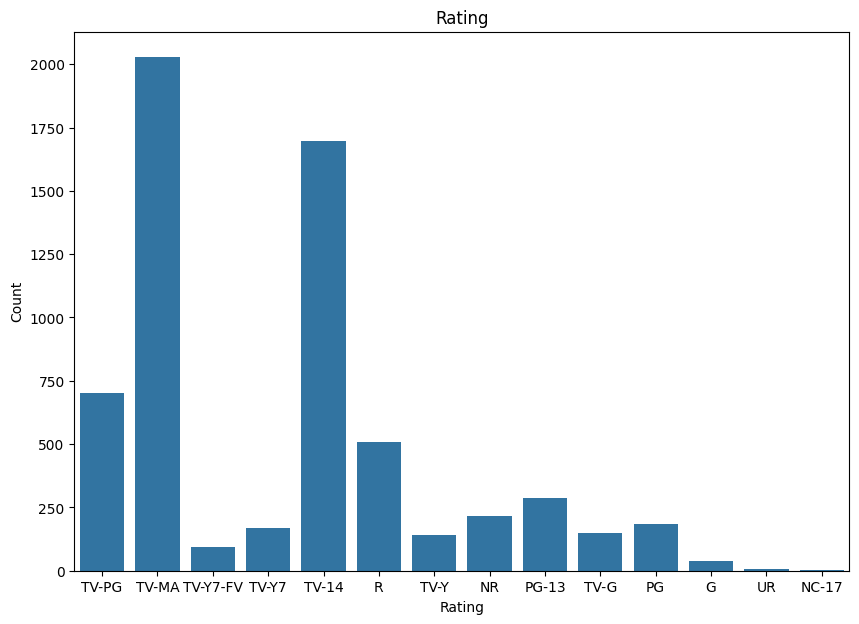

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='rating')

plt.title("Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

<Axes: title={'center': 'Relation between Type and Rating'}, xlabel='rating', ylabel='count'>

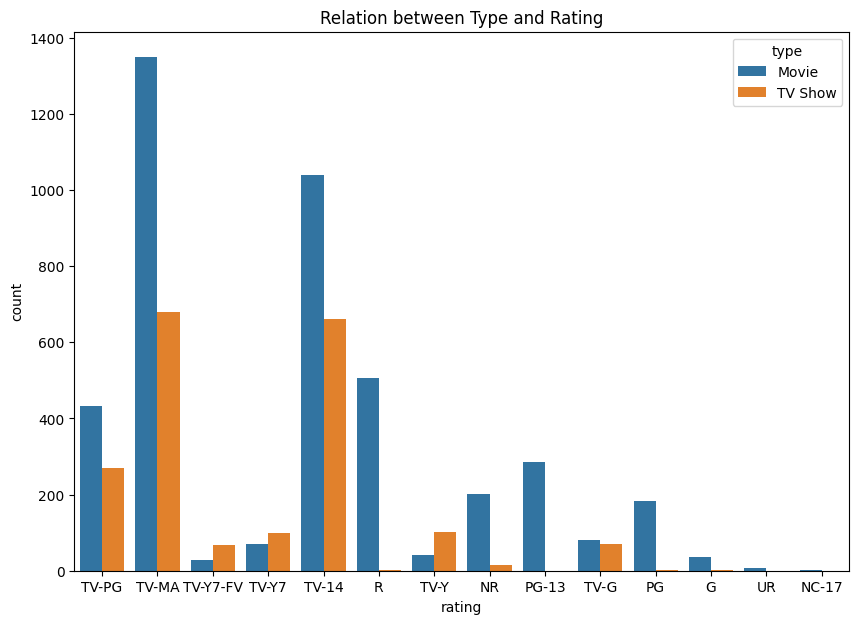

In [30]:
plt.figure(figsize=(10,7))
plt.title('Relation between Type and Rating')
sns.countplot(x="rating" , hue= "type" , data=df)

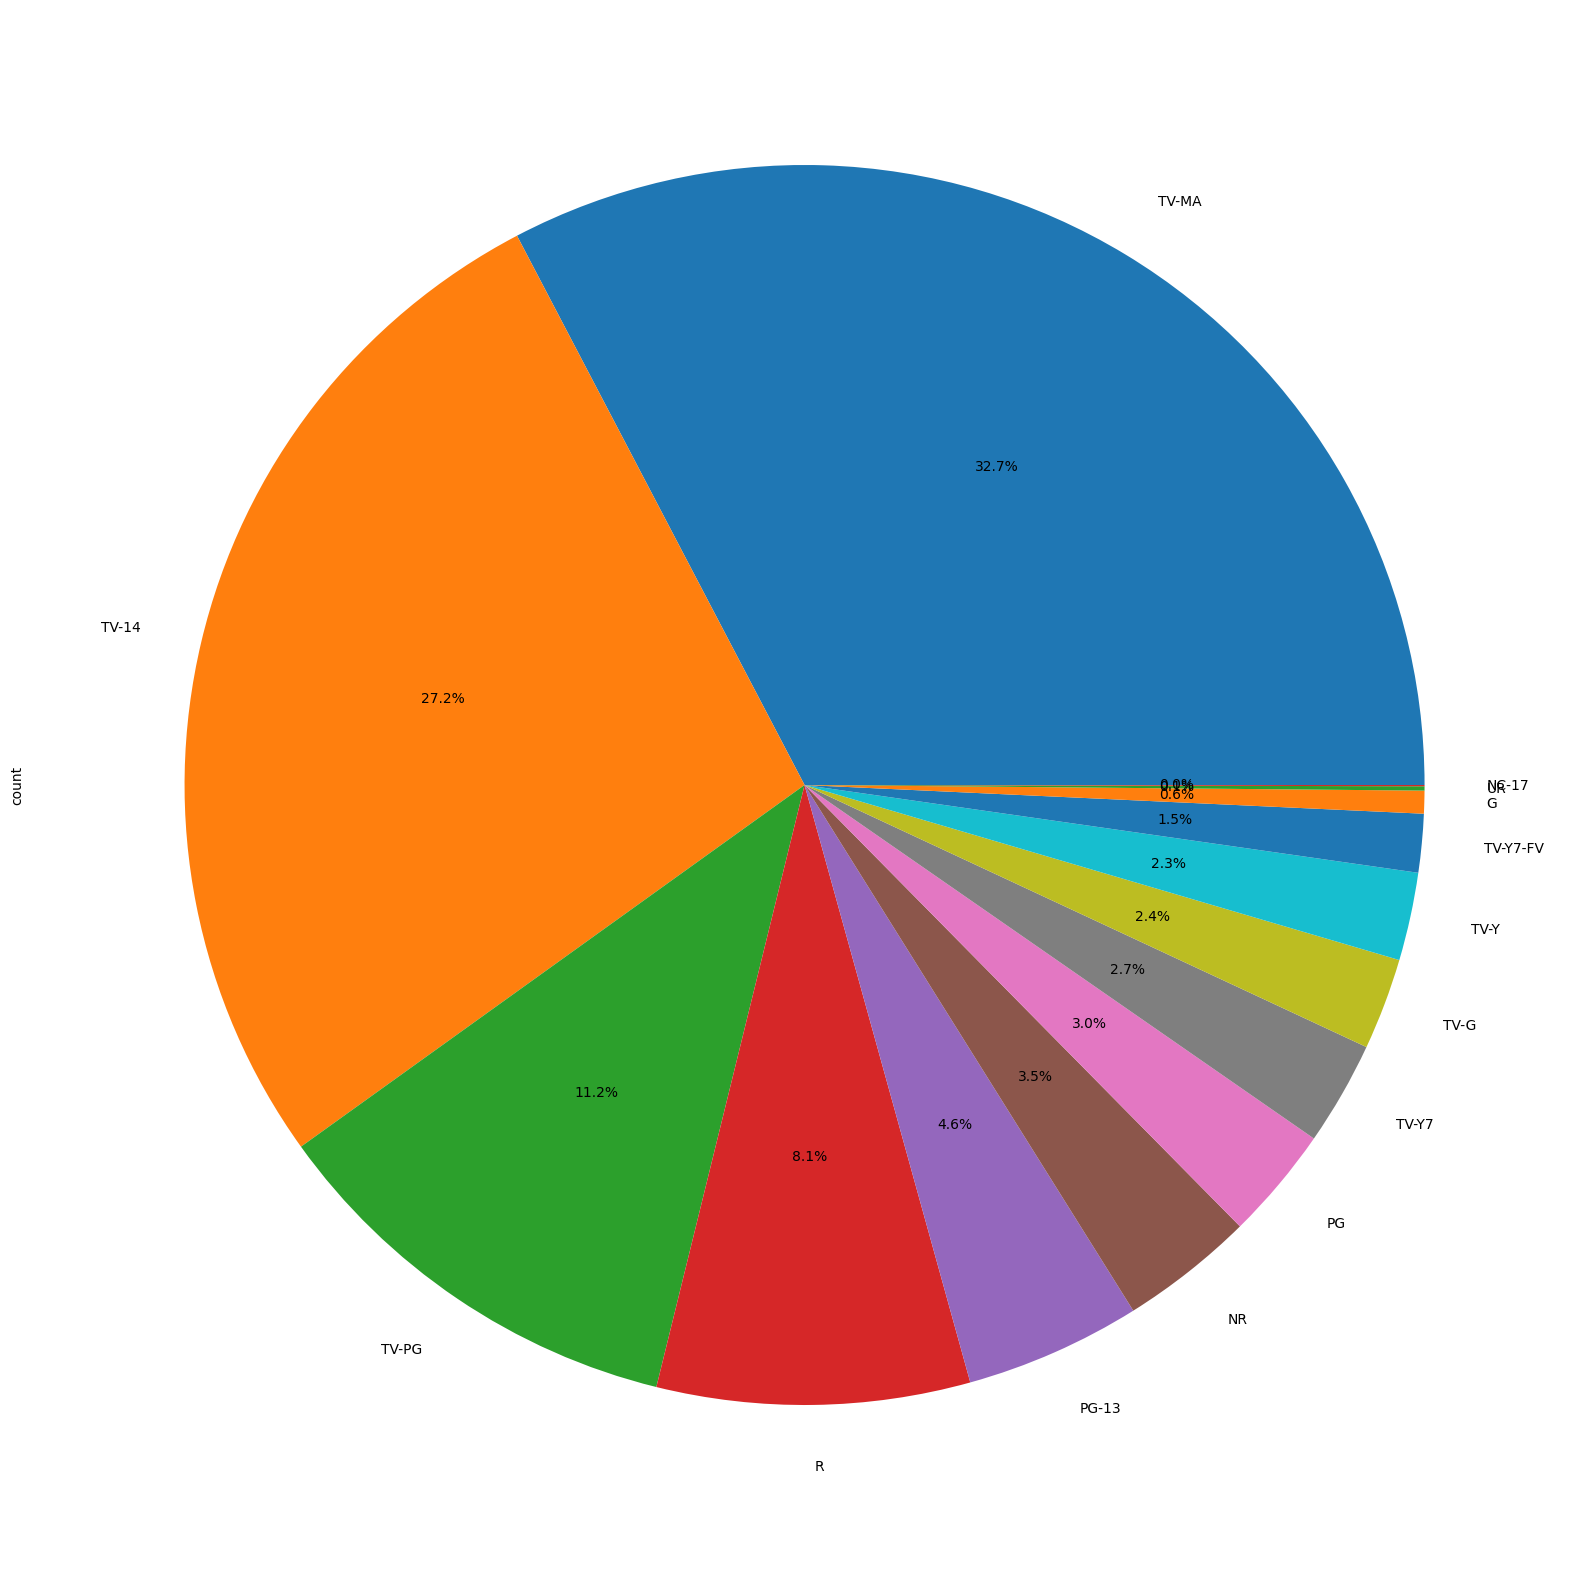

In [52]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35))
plt.show()


Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

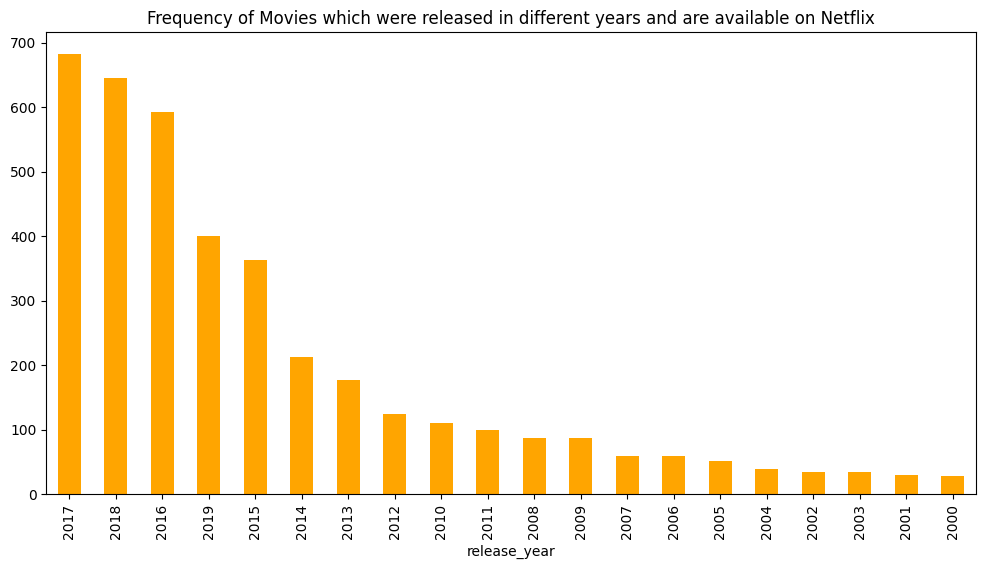

In [54]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="orange")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

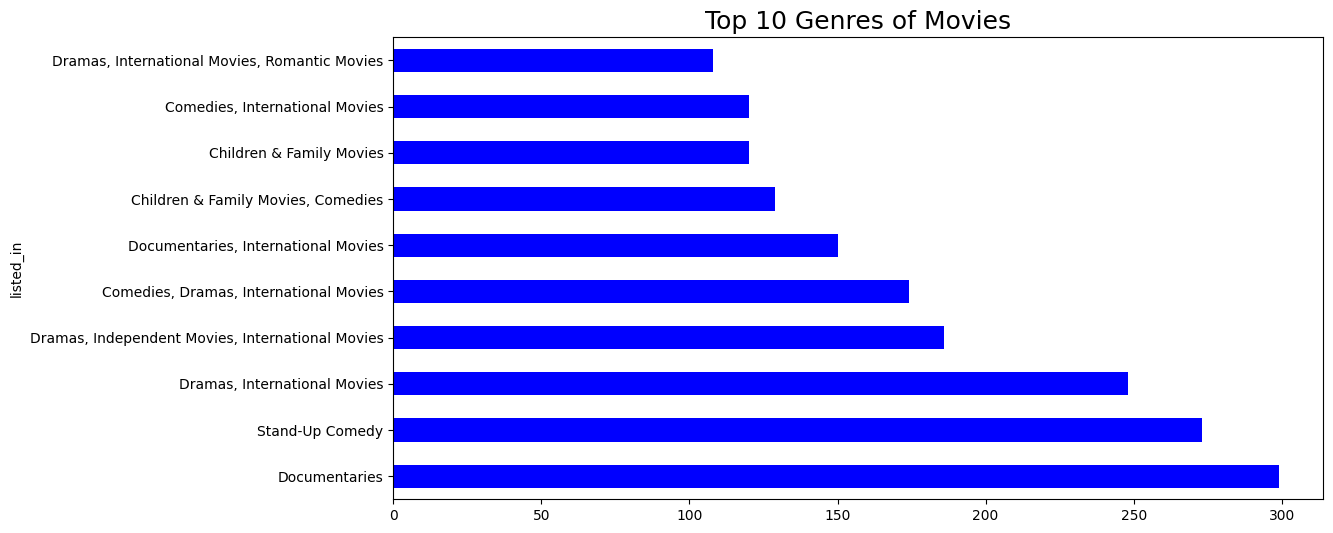

In [56]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="blue")
plt.title("Top 10 Genres of Movies",size=18)